In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle
from scipy.spatial.distance import pdist, squareform

from collections import defaultdict

# Setup

In [2]:
km = pickle.load(open("modelli/euclidean.pickle", 'rb'))
km_dtw = pickle.load(open("modelli/dtw.pickle", 'rb'))
X1 = np.genfromtxt('X.csv', delimiter=',') 
X2 = np.genfromtxt('X_paa.csv', delimiter=',')

In [3]:
X1.shape, X2.shape

((6000, 1292), (800, 200))

In [4]:
ts_list1 = []

for label in np.unique(km.labels_):
    idx = np.argmin(np.sum(squareform(pdist(X1[np.where(km.labels_ == label)[0]])), axis=0))
    ts_list1.append(X1[np.where(km.labels_ == label)[0]][idx])
    
ts_list2 = []

for label in np.unique(km_dtw.labels_):
    idx = np.argmin(np.sum(squareform(pdist(X2[np.where(km_dtw.labels_ == label)[0]])), axis=0))
    ts_list2.append(X2[np.where(km_dtw.labels_ == label)[0]][idx])

# Motif

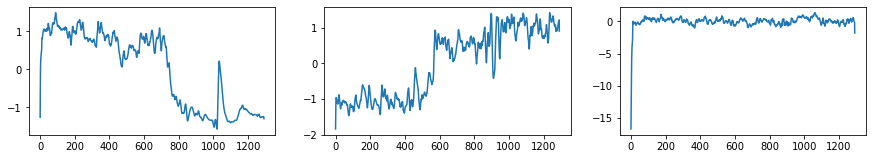

In [11]:
plt.figure(figsize=(15, 8)) 
i=1

for ts in ts_list1:
    plt.subplot(3,3,i)
    plt.plot(ts)
    i=i+1
    
plt.show()

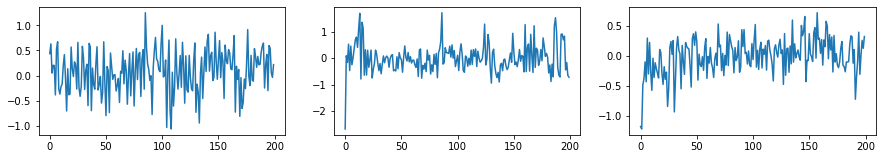

In [12]:
plt.figure(figsize=(15, 8)) 
i=1

for ts in ts_list2:
    plt.subplot(3,3,i)
    plt.plot(ts)
    i=i+1
    
plt.show()

In [13]:
w = 10 #Noise smoothing

for i in range(len(ts_list1)):
    ts = pd.Series(ts_list1[i].reshape(1, -1).squeeze())
    ts_list1[i] = ((ts - ts.mean())/ts.std()).rolling(window=w, min_periods=1).mean().to_numpy()

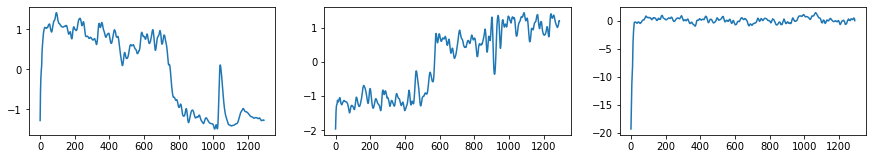

In [14]:
plt.figure(figsize=(15, 8)) 
i=1

for ts in ts_list1:
    plt.subplot(3,3,i)
    plt.plot(ts)
    i=i+1
    
plt.show()

## Matrix profile

In [15]:
from matrixprofile import *

In [16]:
w1 = 30
w2 = 5

mp_list1 = []
mp_list2 = []

for ts in ts_list1:
    mp_list1.append((matrixProfile.stomp(ts, w1)))
    
for ts in ts_list2:
    mp_list2.append((matrixProfile.stomp(ts, w2)))

Parameters
- max_motifs: stop finding new motifs once we have max_motifs
- radius: For each motif found, find neighbors that are within radius*motif_mp of the first.
- n_neighbors: number of neighbors from the first to find. If it is None, find all.
- ex_zone: minimum distance between indices for after each subsequence is identified. Defaults to m/2 where m is the subsequence length. If ex_zone = 0, only the found index is exclude, if ex_zone = 1 then if idx is found as a motif idx-1, idx, idx+1 are excluded.

Returns
The function returns a tuple (top_motifs, distances) which are lists of the same length.

- top_motifs: This is a list of the indices found for each motif. The first index is the nth motif followed by all nearest neighbors found sorted by distances.
- distances: Minimum Matrix profile value for each motif set.

In [17]:
motif_list1 = []
motif_list2 = []

for i in range(len(ts_list1)):
    motif_list1.append(motifs.motifs(ts_list1[i], (mp_list1[i][0], mp_list1[i][1]), max_motifs=10))
    
for i in range(len(ts_list2)):
    motif_list2.append(motifs.motifs(ts_list2[i], (mp_list2[i][0], mp_list2[i][1]), max_motifs=7))

In [25]:
motif_list1[0][0], motif_list1[0][1], motif_list2[0][0], motif_list2[0][1]

([[448, 1192],
  [745, 958, 1045],
  [243, 804],
  [355, 917],
  [204, 406, 499, 1017],
  [322, 568],
  [524, 1252],
  [142, 386, 872]],
 [0.14401243781036688,
  0.17441284710057528,
  0.22172840371935396,
  0.3287590622098398,
  0.3364769108991553,
  0.4072490444054021,
  0.4114613919310328,
  0.42032740878682956],
 [[60, 192], [65, 151], [96, 125], [1, 55], [13, 118], [33, 49, 138]],
 [0.08031186566089495,
  0.0986876836817628,
  0.1411305746625821,
  0.1931912903288443,
  0.21104332966030598,
  0.23510937530476322])

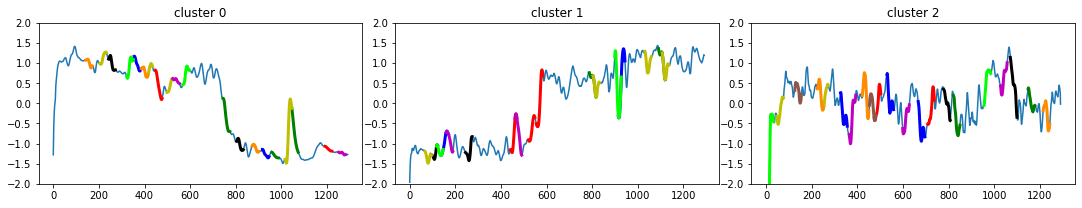

In [26]:
plt.figure(figsize=(15, 8)) 

for i in range(len(ts_list1)):
    ts1 = ts_list1[i]
    mo1 = motif_list1[i][0]
    mod1 = motif_list1[i][1]
    
    plt.subplot(3,3,i+1)
    plt.plot(ts1)
    plt.ylim([-2,2])
    plt.title('cluster '+ str(i))
    colors1 = ['r', 'g', 'k', 'b', 'y', 'lime', 'm', 'darkorange', 'tab:brown'][:len(mo1)]
    for m, d, c in zip(mo1, mod1, colors1):
        for i in m:
            m_shape = ts1[i:i+w1]
            plt.plot(range(i,i+w1), m_shape, color=c, lw=3)


plt.tight_layout()   

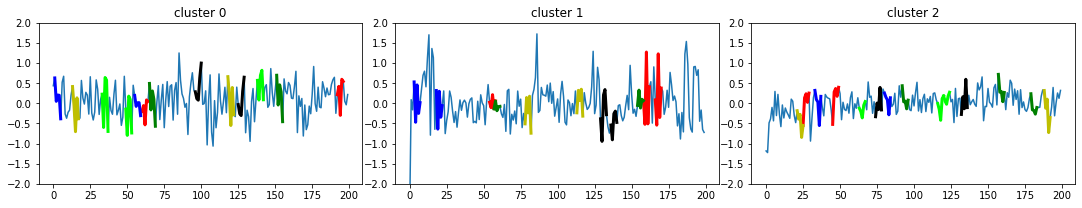

In [27]:
plt.figure(figsize=(15, 8)) 

for i in range(len(ts_list2)):
    ts2 = ts_list2[i]
    mo2 = motif_list2[i][0]
    mod2 = motif_list2[i][1]
    
    plt.subplot(3,3,i+1)
    plt.plot(ts2)
    plt.ylim([-2,2])
    plt.title('cluster '+ str(i))
    colors2 = ['r', 'g', 'k', 'b', 'y', 'lime', 'm', 'darkorange', 'tab:brown'][:len(mo2)]
    for m, d, c in zip(mo2, mod2, colors2):
        for i in m:
            m_shape = ts2[i:i+w2]
            plt.plot(range(i,i+w2), m_shape, color=c, lw=3)


plt.tight_layout()   

In [28]:
import warnings
warnings.filterwarnings("ignore")

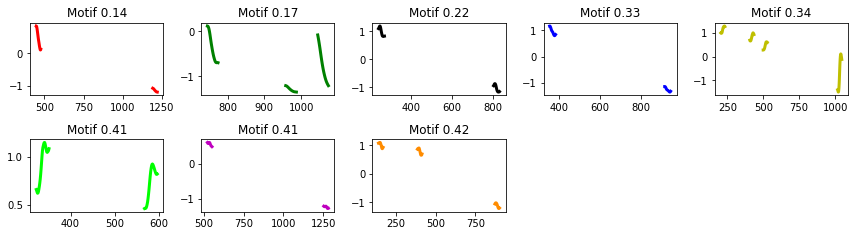

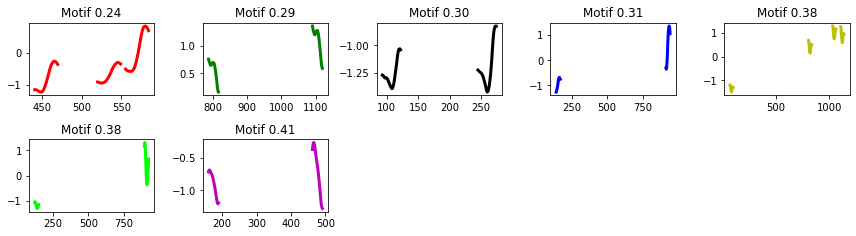

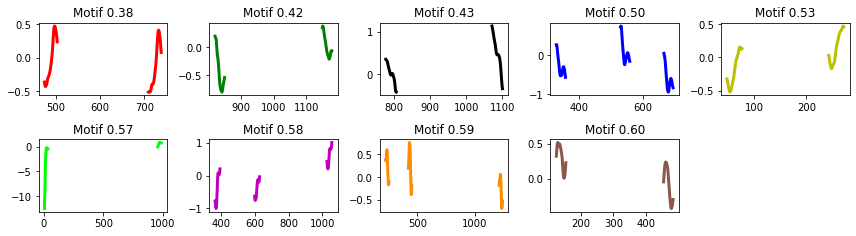

In [29]:
for i in range(len(ts_list1)):
    n=0
    plt.figure(figsize=(12, 8))
    ts1 = ts_list1[i]
    mo1 = motif_list1[i][0]
    mod1 = motif_list1[i][1]
    
    for m, d, c in zip(mo1, mod1, colors1):
        n=n+1
        plt.subplot(5,5,n)
        plt.title("Motif " + str("%.2f" % round(d, 2)))
        for i in m:
            m_shape = ts1[i:i+w1]
            plt.plot(range(i,i+w1), m_shape, color=c, lw=3)
            
    plt.tight_layout()
    plt.show()

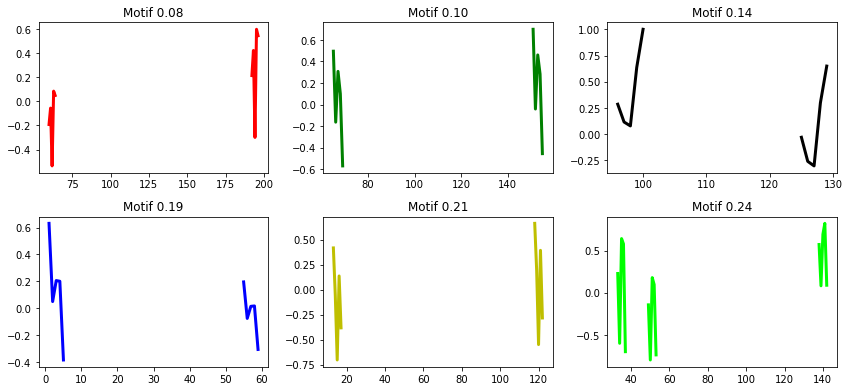

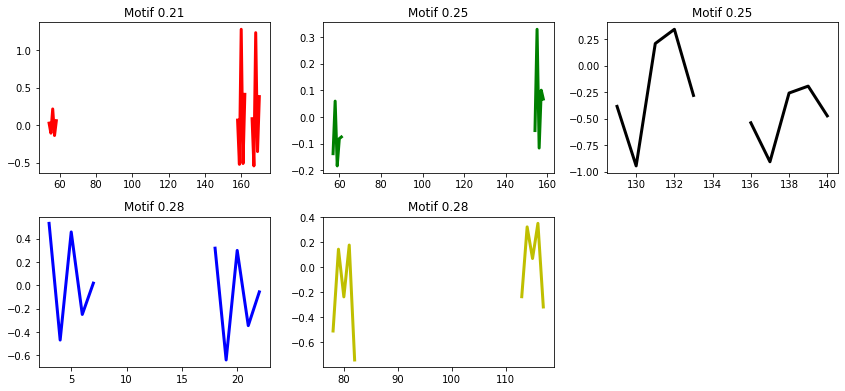

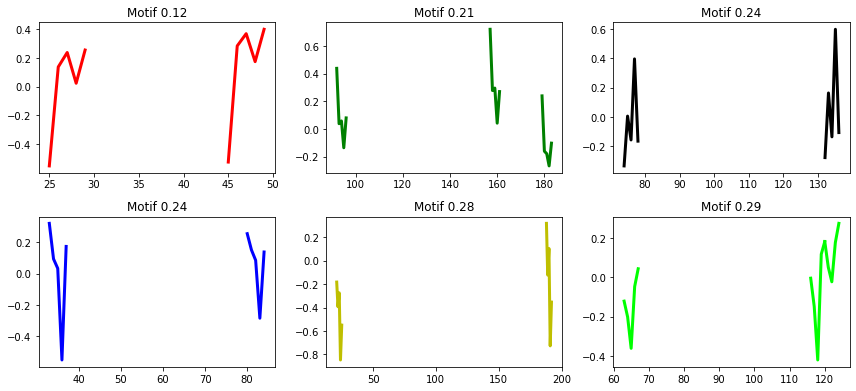

In [31]:
for i in range(len(ts_list2)):
    n=0
    plt.figure(figsize=(12, 8))
    ts2 = ts_list2[i]
    mo2 = motif_list2[i][0]
    mod2 = motif_list2[i][1]
    
    for m, d, c in zip(mo2, mod2, colors2):
        n=n+1
        plt.subplot(3,3,n)
        plt.title("Motif " + str("%.2f" % round(d, 2)))
        for i in m:
            m_shape = ts2[i:i+w2]
            plt.plot(range(i,i+w2), m_shape, color=c, lw=3)

    plt.tight_layout()
    plt.show()

## Anomaly Discovery

In [32]:
from matrixprofile.discords import discords

Parameters  
- mp: matrix profile numpy array
- k: the number of discords to discover
- ex_zone: the number of samples to exclude and set to Inf on either side of a found discord    

Returns 
 - a list of indexes represent the discord starting locations. MaxInt indicates there were no more discords that could be found due to too many exclusions or profile being too small. Discord start indices are sorted by highest matrix profile value.

In [77]:
anoms_list1 = []
anoms_list2 = []

for i in range(len(ts_list1)):
    anoms_list1.append(discords(mp_list1[i][0], ex_zone=3, k=10))
    
for i in range(len(ts_list2)):
    anoms_list2.append(discords(mp_list2[i][0], ex_zone=3, k=7))

In [78]:
anoms_list1[0], anoms_list2[0]

(array([ 997,  594,  516,  335, 1000,  188,  481, 1225,   21,  888]),
 array([ 22, 107, 165,  26,  93,  11,  63]))

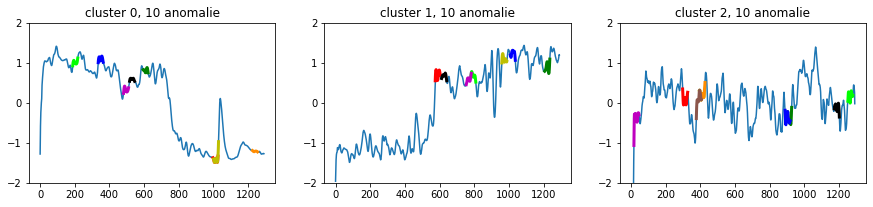

In [83]:
plt.figure(figsize=(15, 10))

for i in range(len(anoms_list1)):
    ts1 = ts_list1[i]
    mo1 = motif_list1[i][0]
    mod1 = motif_list1[i][1]
    anoms = anoms_list1[i]
    
    plt.subplot(3,3,i+1)
    plt.plot(ts1)
    plt.ylim([-2,2])
    plt.title('cluster '+ str(i) + ', ' + str(len(anoms)) + ' anomalie')
    colors1 = ['r', 'g', 'k', 'b', 'y', 'lime', 'm', 'darkorange', 'tab:brown'][:len(mo1)]
    
    for a, c in zip(anoms, colors1):
        a_shape = ts1[a:a+w1]
        plt.plot(range(a, a+w1), a_shape, color=c, lw=3)

plt.show()

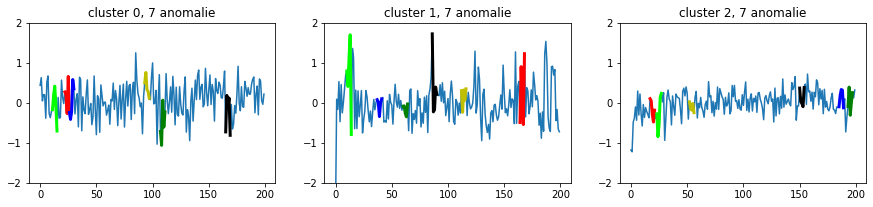

In [84]:
plt.figure(figsize=(15, 10))

for i in range(len(anoms_list2)):
    ts2 = ts_list2[i]
    mo2 = motif_list2[i][0]
    mod2 = motif_list2[i][1]
    anoms = anoms_list2[i]
    
    plt.subplot(3,3,i+1)
    plt.plot(ts2)
    plt.ylim([-2,2])
    plt.title('cluster '+ str(i) + ', ' + str(len(anoms)) + ' anomalie')
    colors1 = ['r', 'g', 'k', 'b', 'y', 'lime', 'm', 'darkorange', 'tab:brown'][:len(mo1)]
    
    for a, c in zip(anoms, colors2):
        a_shape = ts2[a:a+w2]
        plt.plot(range(a, a+w2), a_shape, color=c, lw=3)

plt.show()